In [1]:
import numpy as np                                                                        
import matplotlib.pyplot as plt
import pyCloudy as pc
import pyneb as pn
from astropy    import constants as const
from astropy.io import ascii
import pandas as pd

# from scipy.integrate import simps
from numpy import log10, exp

kpc = const.kpc.cgs.value

path = r'/home/jin/CIV_Photoionization/Lumin_42/CIV_Lumin_42'
Mod = pc.CloudyModel(path)
Mod.print_lines()
A = Mod.n_ions
#print(A)
Mod.ionic_names
Lum_Lya = float(Mod.get_emis_vol('H__1_121567A'))
Lum_He2 = float(Mod.get_emis_vol('HE_2_164043A'))
Lum_O6 = float(Mod.get_emis_vol('O__6_103191A')) + float(Mod.get_emis_vol('O__6_103762A'))
Lum_C4 = float(Mod.get_emis_vol('C__4_154819A')) + float(Mod.get_emis_vol('C__4_155078A'))
Lum_N5 = float(Mod.get_emis_vol('N__5_123882A')) + float(Mod.get_emis_vol('N__5_124280A'))
Lum_Mg2 = float(Mod.get_emis_vol('MG_2_279553A'))+ float(Mod.get_emis_vol('MG_2_280271A'))




#print(np.sum(Mod.dr*Mod.nH))

N_H = sum(Mod.dr*Mod.nH)
frac_He = 1.0E-01
frac_C = 2.45E-04
frac_O = 4.90E-04
frac_N = 8.51E-05
frac_Mg = 3.47E-05

N_HI = sum(Mod.dr*Mod.nH*Mod.get_ionic('H',0))
N_HII = sum(Mod.dr*Mod.nH*Mod.get_ionic('H',1))
N_HeII = frac_He*sum(Mod.dr*Mod.nH*Mod.get_ionic('He',1))
N_OVI = frac_O*sum(Mod.dr*Mod.nH*Mod.get_ionic('O',5))
N_NV = frac_N*sum(Mod.dr*Mod.nH*Mod.get_ionic('N',4))
N_CIV = frac_C*sum(Mod.dr*Mod.nH*Mod.get_ionic('C',3))

f = open('/home/jin/CIV_Photoionization/Lumin_42/CIV_Lumin_42.ele_Mg','r')
header = f.readline()
frac_Mg_II = np.zeros(len(Mod.nH))
# print(len(f[0]))
i = 0
for line in f:
    line = line.strip()
    columns = line.split()
    j = float(columns[2])
    frac_Mg_II[i] = j
    i = i + 1
N_MgII = frac_Mg*sum(Mod.dr*Mod.nH*frac_Mg_II)

print('N_H', N_H)
print('Lya',Lum_Lya, N_HI)
print('He II',Lum_He2, N_HeII)
print('O VI',Lum_O6, N_OVI)
print('C IV',Lum_C4, N_CIV)
print('N V',Lum_N5, N_NV)
print('Mg II',Lum_Mg2, N_MgII)




H__1_121567A 1.255585e+42
H__1_102572A 6.750123e+38
H__1_486133A 4.345579e+40
H__1_656281A 1.228203e+41
O__6_103191A 3.238993e+39
O__6_103762A 1.848696e+39
HE_2_972108A 1.442326e+39
HE_2_102527A 3.522517e+39
HE_2_164043A 4.076696e+40
C__4_155078A 6.903321e+39
O__3_500684A 2.930768e+41
N__5_123882A 1.827079e+39
N__5_124280A 1.136420e+39
C__4_154819A 1.319158e+40
C__4_155078A_1 6.903321e+39
MG_2_279553A 1.640129e+40
MG_2_280271A 8.552531e+39
N_H 2.979957565080002e+21
Lya 1.2555852604100388e+42 1.8651768348154656e+21
He II 4.0766960173949893e+40 5.85079409238412e+19
O VI 5.0876888369592586e+39 4.49966293770075e+16
C IV 2.0094899066892932e+40 4.720036193534119e+16
N V 2.9634986644601944e+39 1.0638745034508398e+16
Mg II 2.4953825301952237e+40 6.07227637588153e+16


H I 1.2555852604100388e+42 1.8651768348154656e+21
O VI 5.0876888369592586e+39 4.49966293770075e+16
C IV 2.0094899066892932e+40 4.720036193534119e+16
N V 2.9634986644601944e+39 1.0638745034508398e+16
Mg II 2.4953825301952237e+40 6.07227637588153e+16


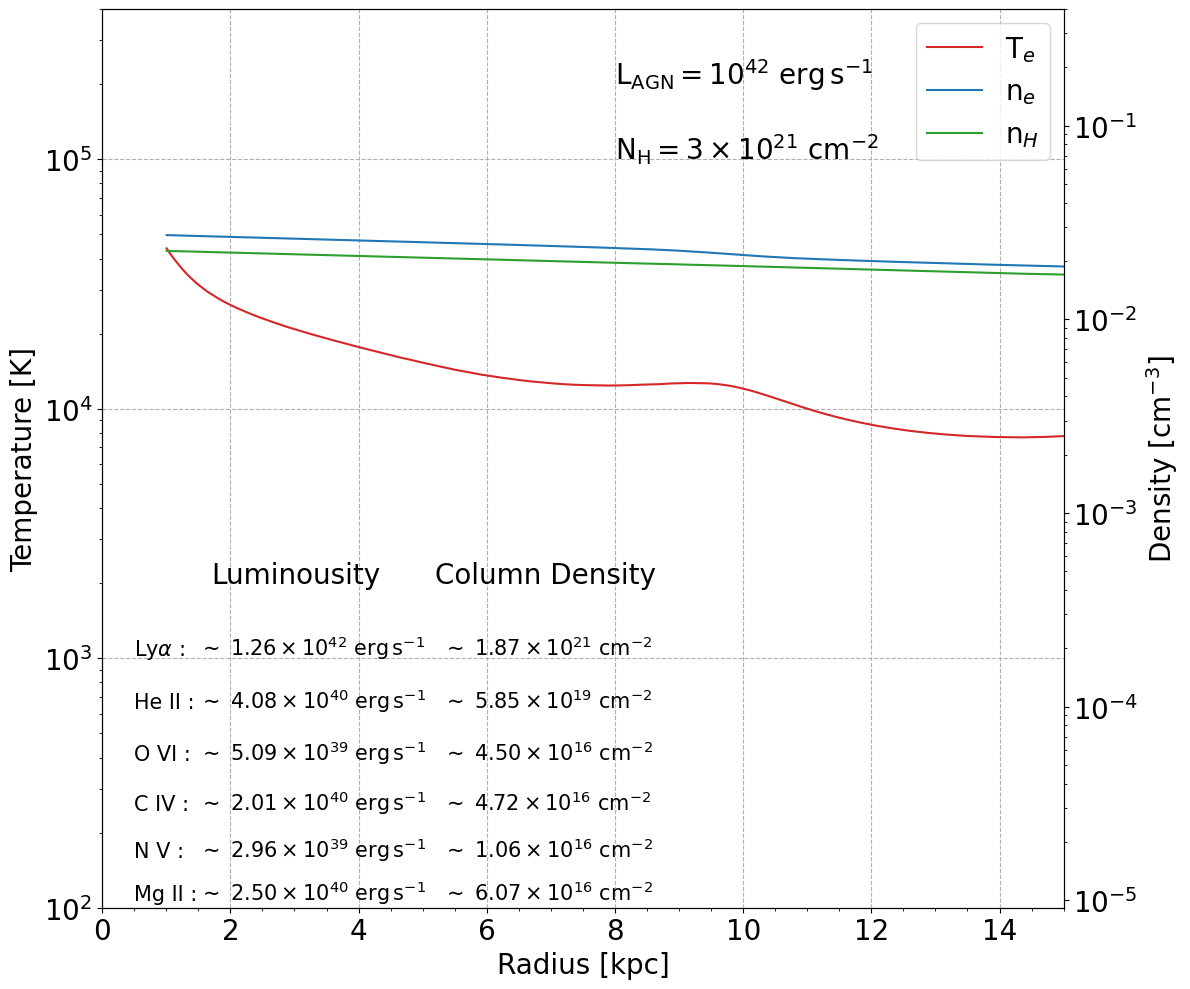

In [17]:
fig, ax1 = plt.subplots(figsize=(12, 10))

# 온도 플롯 (왼쪽 y축)
color = 'tab:red'
ax1.set_xlabel('Radius [kpc]', fontsize=20)
ax1.set_ylabel('Temperature [K]', fontsize=20)
ax1.plot(Mod.radius/kpc, Mod.te, color=color, label=r'T$_{e}$')
ax1.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.minorticks_on()
ax1.set_xlim(0,15)
ax1.set_yscale('log')
plt.legend(fontsize=20)

# 밀도 플롯을 위한 두 번째 y축 생성
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Density [cm$^{-3}$]', fontsize=20)
ax2.plot(Mod.radius/kpc, Mod.ne, color=color, label=r'n$_{e}$')
color = 'tab:green'
ax2.plot(Mod.radius/kpc, Mod.nH, color=color, label=r'n$_{H}$')
ax2.tick_params(axis='y', labelsize=20)
ax2.set_xlim(0,15)
ax2.set_yscale('log')

# 레이아웃 조정
fig.tight_layout()
plt.legend()

# ax1과 ax2의 레전드 합치기
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=20)

# ax2의 레전드 제거
ax2.get_legend().remove()
ax1.set_ylim(top=4e5,bottom=100)
ax2.set_ylim(top=0.4)
ax1.grid(True,linestyle='--')
print('H I',Lum_Lya, N_HI)
print('O VI',Lum_O6, N_OVI)
print('C IV',Lum_C4, N_CIV)
print('N V',Lum_N5, N_NV)
print('Mg II',Lum_Mg2, N_MgII)

def format_scientific(number):
    exponent = int(np.log10(number))
    mantissa = number / 10**exponent
    return f'{mantissa:.2f} \\times 10^{{{exponent}}}'

# 로그 스케일에서 균일한 간격을 위한 y 좌표 계산
y_base = 2e3
y_factor = 0.6  # 간격 조절을 위한 인자
y_coords = [y_base * y_factor**i for i in range(6)]

ax1.text(8, 2e5, r'$\rm L_{\rm AGN} = 10^{42} ~ \rm erg \, \rm s^{-1}$', fontsize=20)
ax1.text(8, 1e5, r'$\rm N_{H} = 3 \times 10^{21} ~ \rm cm^{-2}$', fontsize=20)

di = 2
ax1.text(1.7, y_coords[0] , r'Luminousity', fontsize=20)
ax1.text(5.2, y_coords[0] , r'Column Density', fontsize=20)

labels = ['Ly$\\alpha$','He II','O VI', 'C IV', 'N V', 'Mg II']
luminosities = [Lum_Lya,Lum_He2,Lum_O6, Lum_C4, Lum_N5, Lum_Mg2]
column_densities = [N_HI,N_HeII,N_OVI, N_CIV, N_NV, N_MgII]

for i, (label, lum, col_den) in enumerate(zip(labels, luminosities, column_densities)):
    ax1.text(0.5, y_coords[i]/di+30, f'{label} :', fontsize=15)
    ax1.text(1.5, y_coords[i]/di+30 , r'$\sim ~ {} ~ \rm erg \, \rm s^{{-1}}$'.format(format_scientific(lum)), fontsize=15)
    ax1.text(5.3, y_coords[i]/di+30, r'$\sim ~ {} ~ \rm cm^{{-2}}$'.format(format_scientific(col_den)), fontsize=15)

plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/Lumin_42_CLOUDY.pdf', dpi=300, bbox_inches='tight')

In [3]:
nun = len(Mod.nH)
f = open('/home/jin/CIV_Photoionization/Lumin_42/CIV_Lumin_42.ele_He','r')
header = f.readline()
HeII_frac = np.zeros(nun)
# print(len(f[0]))
i = 0
for line in f:
    line = line.strip()
    columns = line.split()
    j = float(columns[2])
    HeII_frac[i] = j
    i = i + 1

f = open('/home/jin/CIV_Photoionization/Lumin_42/CIV_Lumin_42.ele_C','r')
header = f.readline()
CIV_frac = np.zeros(nun)
# print(len(f[0]))
i = 0
for line in f:
    line = line.strip()
    columns = line.split()
    j = float(columns[4])
    CIV_frac[i] = j
    i = i + 1

f = open('/home/jin/CIV_Photoionization/Lumin_42/CIV_Lumin_42.ele_H','r')
header = f.readline()
HI_frac = np.zeros(nun)
# print(len(f[0]))
i = 0
for line in f:
    line = line.strip()
    columns = line.split()
    j = float(columns[1])
    HI_frac[i] = j
    i = i + 1

f = open('/home/jin/CIV_Photoionization/Lumin_42/CIV_Lumin_42.ele_Mg','r')
header = f.readline()
MgII_frac = np.zeros(nun)
# print(len(f[0]))
i = 0
for line in f:
    line = line.strip()
    columns = line.split()
    j = float(columns[2])
    MgII_frac[i] = j
    i = i + 1

f = open('/home/jin/CIV_Photoionization/Lumin_42/CIV_Lumin_42.ele_O','r')
header = f.readline()
OVI_frac = np.zeros(nun)
# print(len(f[0]))
i = 0
for line in f:
    line = line.strip()
    columns = line.split()
    j = float(columns[6])
    OVI_frac[i] = j
    i = i + 1

f = open('/home/jin/CIV_Photoionization/Lumin_42/CIV_Lumin_42.ele_N','r')
header = f.readline()
NV_frac = np.zeros(nun)
# print(len(f[0]))
i = 0
for line in f:
    line = line.strip()
    columns = line.split()
    j = float(columns[5])
    NV_frac[i] = j
    i = i + 1

R = Mod.radius/kpc

In [4]:
HeII_frac

array([5.52e-04, 5.88e-04, 6.50e-04, 7.12e-04, 7.58e-04, 7.89e-04,
       8.24e-04, 8.69e-04, 9.21e-04, 9.66e-04, 1.00e-03, 1.05e-03,
       1.11e-03, 1.17e-03, 1.23e-03, 1.29e-03, 1.36e-03, 1.45e-03,
       1.52e-03, 1.59e-03, 1.70e-03, 1.81e-03, 1.90e-03, 2.00e-03,
       2.14e-03, 2.28e-03, 2.40e-03, 2.53e-03, 2.71e-03, 2.89e-03,
       3.03e-03, 3.15e-03, 3.33e-03, 3.51e-03, 3.68e-03, 3.87e-03,
       4.12e-03, 4.38e-03, 4.58e-03, 4.80e-03, 5.09e-03, 5.41e-03,
       5.68e-03, 5.98e-03, 6.39e-03, 6.81e-03, 7.17e-03, 7.55e-03,
       8.07e-03, 8.63e-03, 9.12e-03, 9.55e-03, 1.00e-02, 1.06e-02,
       1.13e-02, 1.18e-02, 1.24e-02, 1.33e-02, 1.41e-02, 1.48e-02,
       1.56e-02, 1.66e-02, 1.78e-02, 1.87e-02, 1.99e-02, 2.14e-02,
       2.30e-02, 2.44e-02, 2.58e-02, 2.75e-02, 2.94e-02, 3.13e-02,
       3.33e-02, 3.58e-02, 3.88e-02, 4.18e-02, 4.49e-02, 4.88e-02,
       5.35e-02, 5.83e-02, 6.33e-02, 6.98e-02, 7.78e-02, 8.63e-02,
       9.52e-02, 1.07e-01, 1.22e-01, 1.38e-01, 1.55e-01, 1.74e

/tmp/ipykernel_1226/4128218874.py:11: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(10e-8,0)


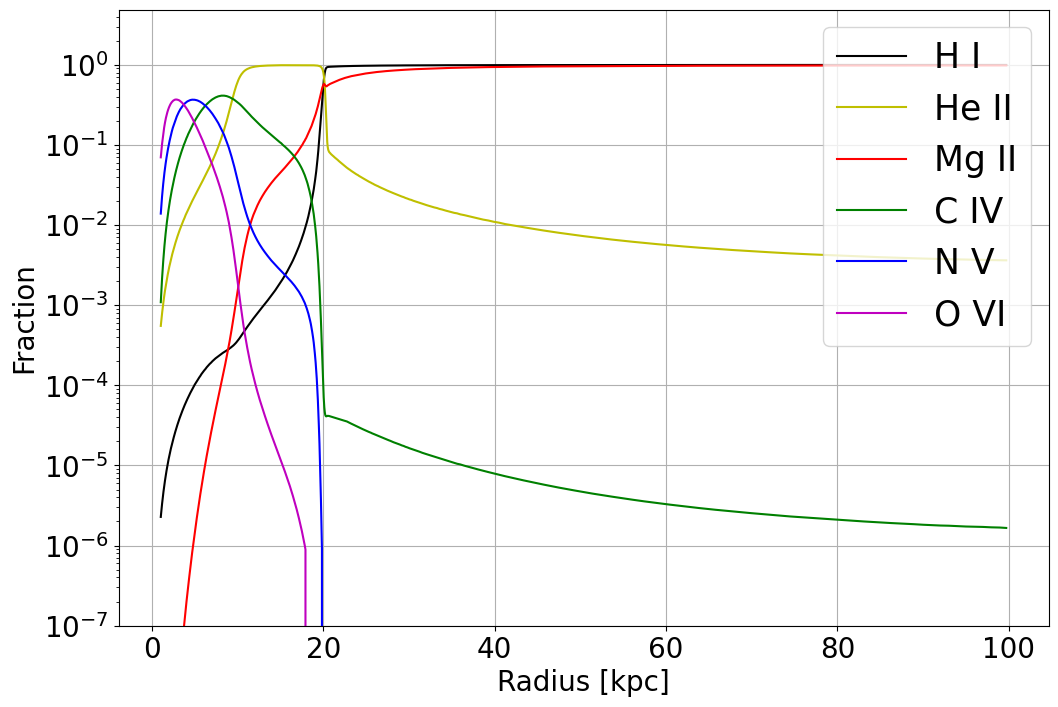

In [5]:
fig = plt.figure(1,figsize=(12, 8))
plt.plot(R,HI_frac,'k',label='H I')
plt.plot(R,HeII_frac,'y',label='He II')
plt.plot(R,MgII_frac,'r',label='Mg II')
plt.plot(R,CIV_frac,'g',label='C IV')
plt.plot(R,NV_frac,'b',label='N V')
plt.plot(R,OVI_frac,'m',label='O VI')

plt.yscale('log')
# plt.xlim(0,15)
plt.ylim(10e-8,0)
plt.xlabel('Radius [kpc]', fontsize=20)
plt.ylabel('Fraction', fontsize=20)
# ax1.plot(Mod.radius/kpc, Mod.te, color=color, label=r'T$_{e}$')
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.grid(True)
plt.legend(loc='upper right',fontsize=25)

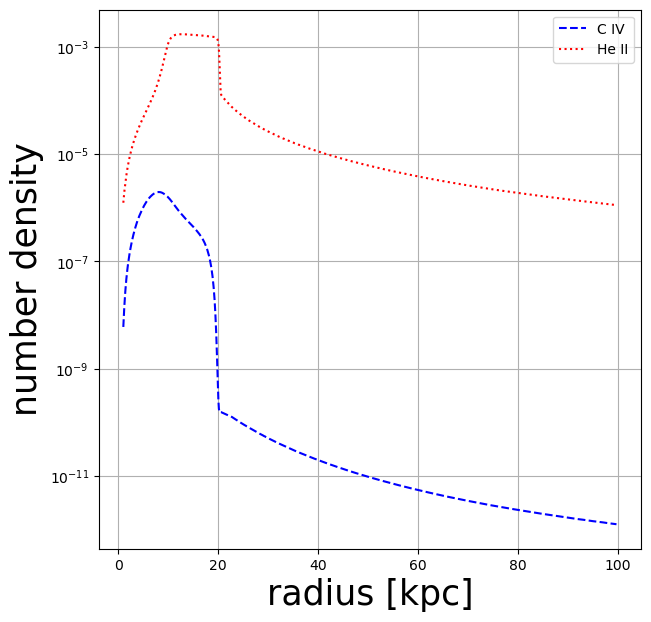

In [23]:
fig = plt.figure(1,figsize=(7,7))
n_H= Mod.nH
n_He = n_H*frac_He
n_C = n_H*frac_C
nden_CIV = CIV_frac*n_C
nden_HeII = HeII_frac*n_He
plt.plot(R,nden_CIV,'b--',label='C IV')
plt.plot(R,nden_HeII,'r:',label='He II')
# plt.xlim(0,15)
plt.grid(True)
plt.xlabel('radius [kpc]',fontsize=25)
plt.ylabel(r'number density',fontsize=25)
plt.yscale('log')
plt.legend()
# plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/Lumin_42_number_Den.pdf', dpi=300, bbox_inches='tight')

name= ['Radius_kpc','number_density']
tt = pd.DataFrame(np.column_stack((R,nden_CIV)),columns=name)
tt.to_csv('/mnt/c/Users/wlsdl/OneDrive/바탕 화면/CIV_number_density.txt', sep='\t', index=False)

tt = pd.DataFrame(np.column_stack((R,nden_HeII)),columns=name)
tt.to_csv('/mnt/c/Users/wlsdl/OneDrive/바탕 화면/HeII_number_density.txt', sep='\t', index=False)

# tt = pd.DataFrame(np.column_stack((R,Lya_emis)),columns=name)
# tt.to_csv('/mnt/c/Users/wlsdl/OneDrive/바탕 화면/Lya_emissivity.txt', sep='\t', index=False)

In [7]:
import numpy as np

CIV_1548_emis = Mod.get_emis('C__4_154819A')
CIV_1551_emis = Mod.get_emis('C__4_155078A')
ratio = CIV_1548_emis / CIV_1551_emis

ratio_t = np.array([])
radius_t = np.array([])
for ii,ra in enumerate (ratio):
    # Check if the value is NaN using np.isnan()
    if np.isnan(ii):
        print('hi')
    else:
        # Append the value to ratio_t correctly
        ratio_t = np.append(ratio_t, ra)
        radius_t = np.append(radius_t, R[ii])


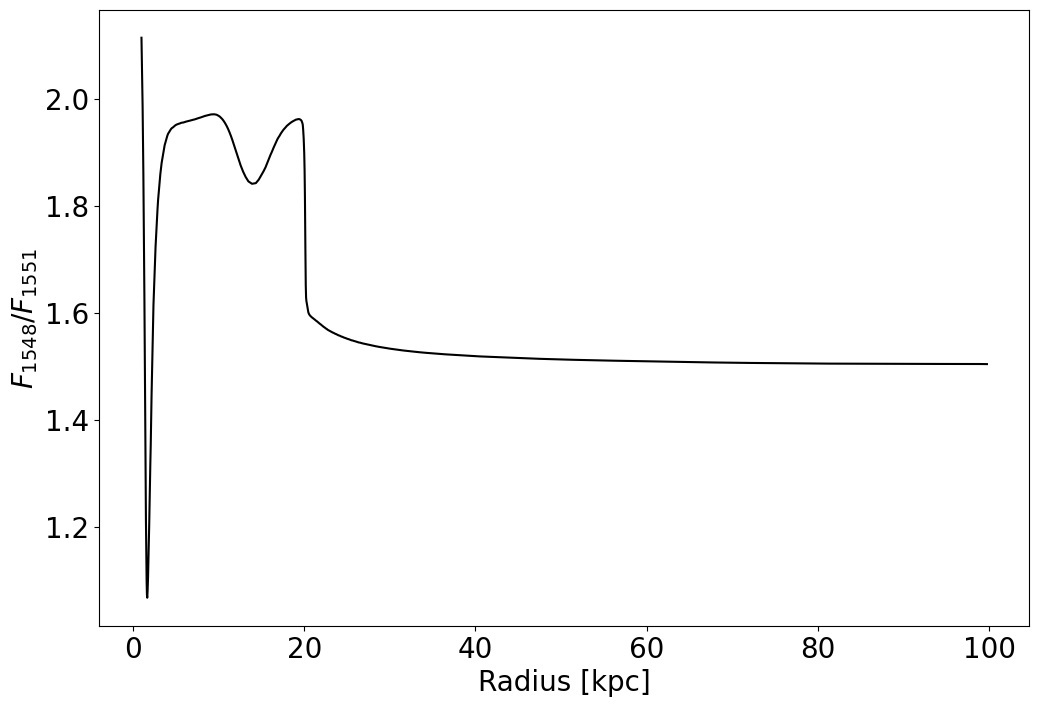

In [8]:
fig = plt.figure(1,figsize=(12, 8))
# (Mod.get_emis('C__4_154819A')) + (Mod.get_emis('C__4_155078A'))
plt.plot(radius_t, ratio_t ,'k')
# plt.legend(fontsize=20)

plt.xlabel('Radius [kpc]', fontsize=20)
plt.ylabel(r'$F_{1548} /F_{1551}$', fontsize=20)
# ax1.plot(Mod.radius/kpc, Mod.te, color=color, label=r'T$_{e}$')
# plt.yticks([1.0,1.2,1.4,1.6,1.8,2.0])
# plt.ylim(1.8,2.1)
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)
# plt.xlim(0,15)

In [9]:
Lya_emis = Mod.get_emis('H__1_121567A')
HeII_emis = Mod.get_emis('HE_2_164043A')
MgII_emis = (Mod.get_emis('MG_2_279553A'))+ (Mod.get_emis('MG_2_280271A'))
OVI_emis = (Mod.get_emis('O__6_103191A')) +(Mod.get_emis('O__6_103762A'))
CIV_emis = (Mod.get_emis('C__4_154819A')) + (Mod.get_emis('C__4_155078A'))
NV_emis = (Mod.get_emis('N__5_123882A')) + (Mod.get_emis('N__5_124280A'))


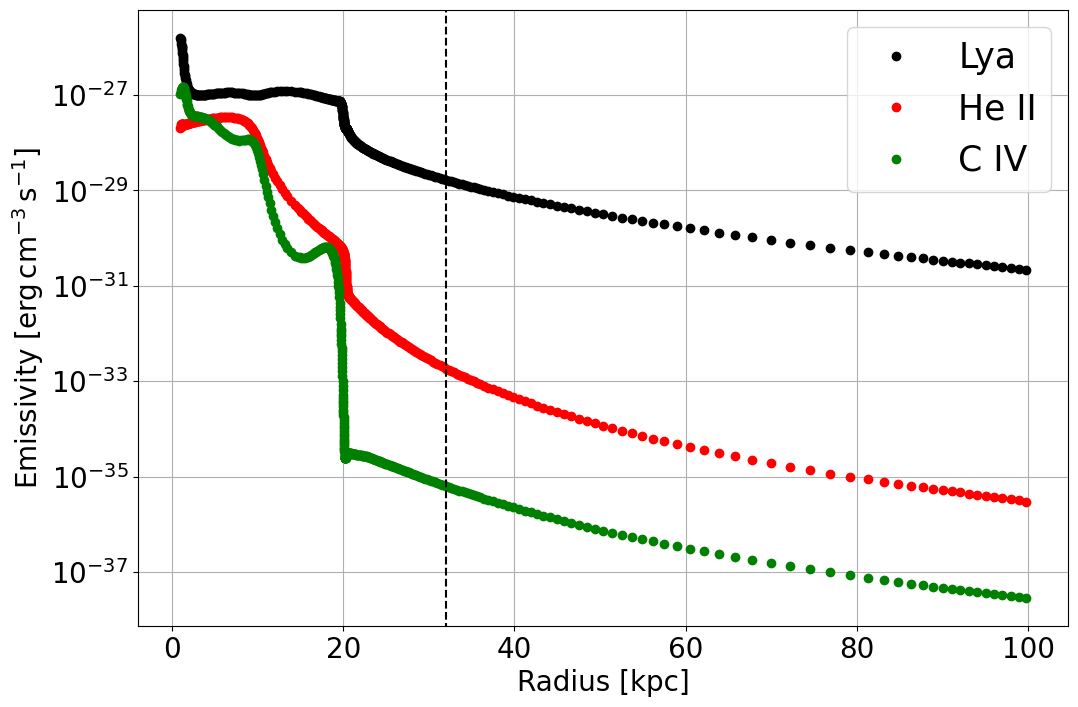

In [10]:
fig = plt.figure(1,figsize=(12, 8))
plt.plot(R,Lya_emis,'ko',label='Lya')
plt.plot(R,HeII_emis,'ro',label='He II')
plt.plot(R,CIV_emis,'go',label='C IV')
# plt.plot(R,NV_emis,'b',label='N V')
# plt.plot(R,OVI_emis,'m',label='O VI')

plt.yscale('log')
# x_max = R[np.where(CIV_emis==0)[0].min()]
plt.axvline(x=32,ymin=-1,ymax=1,linestyle='--',color='k')
# plt.xlim(0,20)
plt.xlabel('Radius [kpc]', fontsize=20)
plt.ylabel(r'Emissivity [$\rm erg\,cm^{-3}\,s^{-1}$]', fontsize=20)
# ax1.plot(Mod.radius/kpc, Mod.te, color=color, label=r'T$_{e}$')
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.grid(True)
plt.legend(loc='upper right',fontsize=25)

name= ['Radius_kpc','Emissivity']
tt = pd.DataFrame(np.column_stack((R,CIV_emis)),columns=name)
tt.to_csv('/mnt/c/Users/wlsdl/OneDrive/바탕 화면/CIV_emissivity.txt', sep='\t', index=False)

tt = pd.DataFrame(np.column_stack((R,HeII_emis)),columns=name)
tt.to_csv('/mnt/c/Users/wlsdl/OneDrive/바탕 화면/HeII_emissivity.txt', sep='\t', index=False)

tt = pd.DataFrame(np.column_stack((R,Lya_emis)),columns=name)
tt.to_csv('/mnt/c/Users/wlsdl/OneDrive/바탕 화면/Lya_emissivity.txt', sep='\t', index=False)

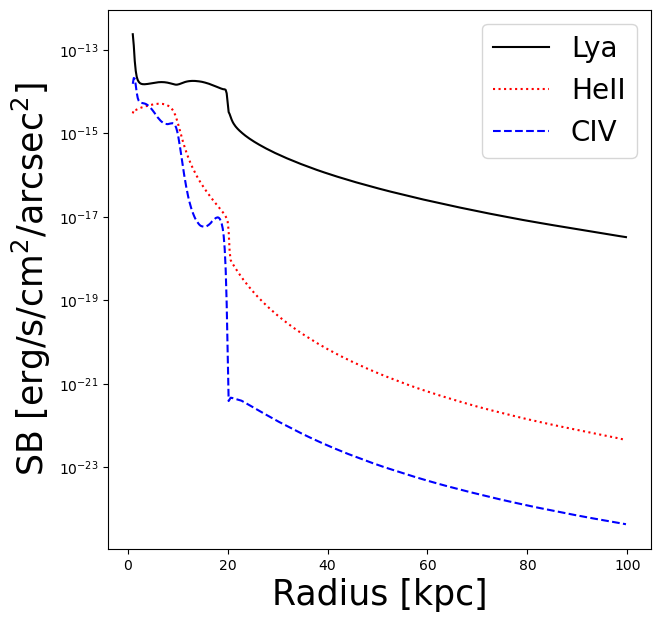

In [16]:
from scipy.integrate import quad 
from scipy.interpolate import interp1d
fig = plt.figure(1,figsize=(7,7))

path = r'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/CIV_emissivity.txt'
path_1 = r'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/HeII_emissivity.txt'
path_2 = r'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/Lya_emissivity.txt'


data = pd.read_csv(path,sep='\t')
Rad, Emiss = data['Radius_kpc'].to_numpy(), data['Emissivity'].to_numpy()
Rad_kpc = Rad*kpc

data_1 = pd.read_csv(path_1,sep='\t')
Rad_1, Emiss_1 = data_1['Radius_kpc'].to_numpy(), data_1['Emissivity'].to_numpy()
Rad_kpc_1 = Rad_1*kpc

data_2 = pd.read_csv(path_2,sep='\t')
Rad_2, Emiss_2 = data_2['Radius_kpc'].to_numpy(), data_2['Emissivity'].to_numpy()
Rad_kpc_2 = Rad_2*kpc

Interpolate_emissivity= interp1d(Rad_kpc,Emiss,bounds_error=False,fill_value=0)

Interpolate_emissivity_1= interp1d(Rad_kpc_1,Emiss_1,bounds_error=False,fill_value=0)

Interpolate_emissivity_2= interp1d(Rad_kpc_2,Emiss_2,bounds_error=False,fill_value=0)

def emissivity_intergrate(l,b):
    r = np.sqrt(l**2 + b**2)
    return Interpolate_emissivity(r)

def emissivity_intergrate_1(l,b):
    r = np.sqrt(l**2 + b**2)
    return Interpolate_emissivity_1(r)

def emissivity_intergrate_2(l,b):
    r = np.sqrt(l**2 + b**2)
    return Interpolate_emissivity_2(r)


radial_kpc = np.linspace(Rad_kpc.min(),Rad_kpc.max(),500)
radial_kpc_1 = np.linspace(Rad_kpc_1.min(),Rad_kpc_1.max(),500)
radial_kpc_2 = np.linspace(Rad_kpc_2.min(),Rad_kpc_2.max(),500)

SB = np.zeros(len(radial_kpc))
SB_1 = np.zeros(len(radial_kpc_1))
SB_2 = np.zeros(len(radial_kpc_2))


for ii , bb in enumerate(radial_kpc):
    vv, _ = quad(emissivity_intergrate, -np.inf, np.inf, args=(bb,))
    # print(bb)
    SB[ii] = vv

for ii , bb in enumerate(radial_kpc_1):
    vv, _ = quad(emissivity_intergrate_1, -np.inf, np.inf, args=(bb,))
    # print(bb)
    SB_1[ii] = vv

for ii , bb in enumerate(radial_kpc_2):
    vv, _ = quad(emissivity_intergrate_2, -np.inf, np.inf, args=(bb,))
    # print(bb)
    SB_2[ii] = vv

SI_sr_to_arc = 4.25e10 # sr_to_arcsec2
xx = radial_kpc / kpc 
xx_1 = radial_kpc_1 / kpc 
xx_2 = radial_kpc_2 / kpc 

plt.xlabel('Radius [kpc]',fontsize=25)
plt.ylabel(r'SB $\rm [erg/s/cm^{2}/arcsec^{2}]$',fontsize=25)
plt.yscale('log')
z = 1
yy =SB*SI_sr_to_arc / (1+z)**3
yy_1 =SB_1*SI_sr_to_arc / (1+z)**3
yy_2 =SB_2*SI_sr_to_arc / (1+z)**3
plt.plot(xx_2,yy_2,'k-',label='Lya')
plt.plot(xx_1,yy_1,'r:',label='HeII')
plt.plot(xx,yy,'b--',label='CIV')

# plt.xlim(1,xmax=30)
plt.legend(fontsize=20)
# plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/SB_CLOUDY_42.pdf', dpi=300, bbox_inches='tight')

In [12]:
print(np.log10(6))

0.7781512503836436


In [13]:
fig = plt.figure(1,figsize=(12, 8))
plt.plot(R,HI_emis,'k',label='H I')
# plt.plot(R,MgII_emis,'r',label='Mg II')
# plt.plot(R,CIV_emis,'go',label='C IV')
# plt.plot(R,NV_emis,'b',label='N V')
# plt.plot(R,OVI_emis,'m',label='O VI')

plt.yscale('log')
# x_max = R[np.where(CIV_emis==0)[0].min()]
# plt.axvline(x=32,ymin=-1,ymax=1,linestyle='--',color='k')
# plt.xlim(0,33)
plt.xlabel('Radius [kpc]', fontsize=20)
plt.ylabel(r'Emissivity [$\rm erg\,cm^{-3}\,s^{-1}$]', fontsize=20)
# ax1.plot(Mod.radius/kpc, Mod.te, color=color, label=r'T$_{e}$')
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.grid(True)
plt.legend(loc='upper right',fontsize=25)


NameError: name 'HI_emis' is not defined

<Figure size 1200x800 with 0 Axes>

In [ ]:
# x = R[np.where(CIV_emis==0)[0].min()]
# x

In [ ]:
tt = pd.DataFrame(np.column_stack((R, CIV_emis)), columns=['Radius_kpc', 'Emissivity'])

print(tt)


     Radius_kpc    Emissivity
0      1.004998  1.019940e-27
1      1.029997  1.099150e-27
2      1.071000  1.169720e-27
3      1.109627  1.244220e-27
4      1.137024  1.288280e-27
..          ...           ...
424   96.001281  3.504000e-38
425   96.991339  3.340000e-38
426   97.981073  3.186700e-38
427   98.971131  3.040500e-38
428   99.733038  2.924400e-38

[429 rows x 2 columns]


/tmp/ipykernel_1050/766947627.py:92: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


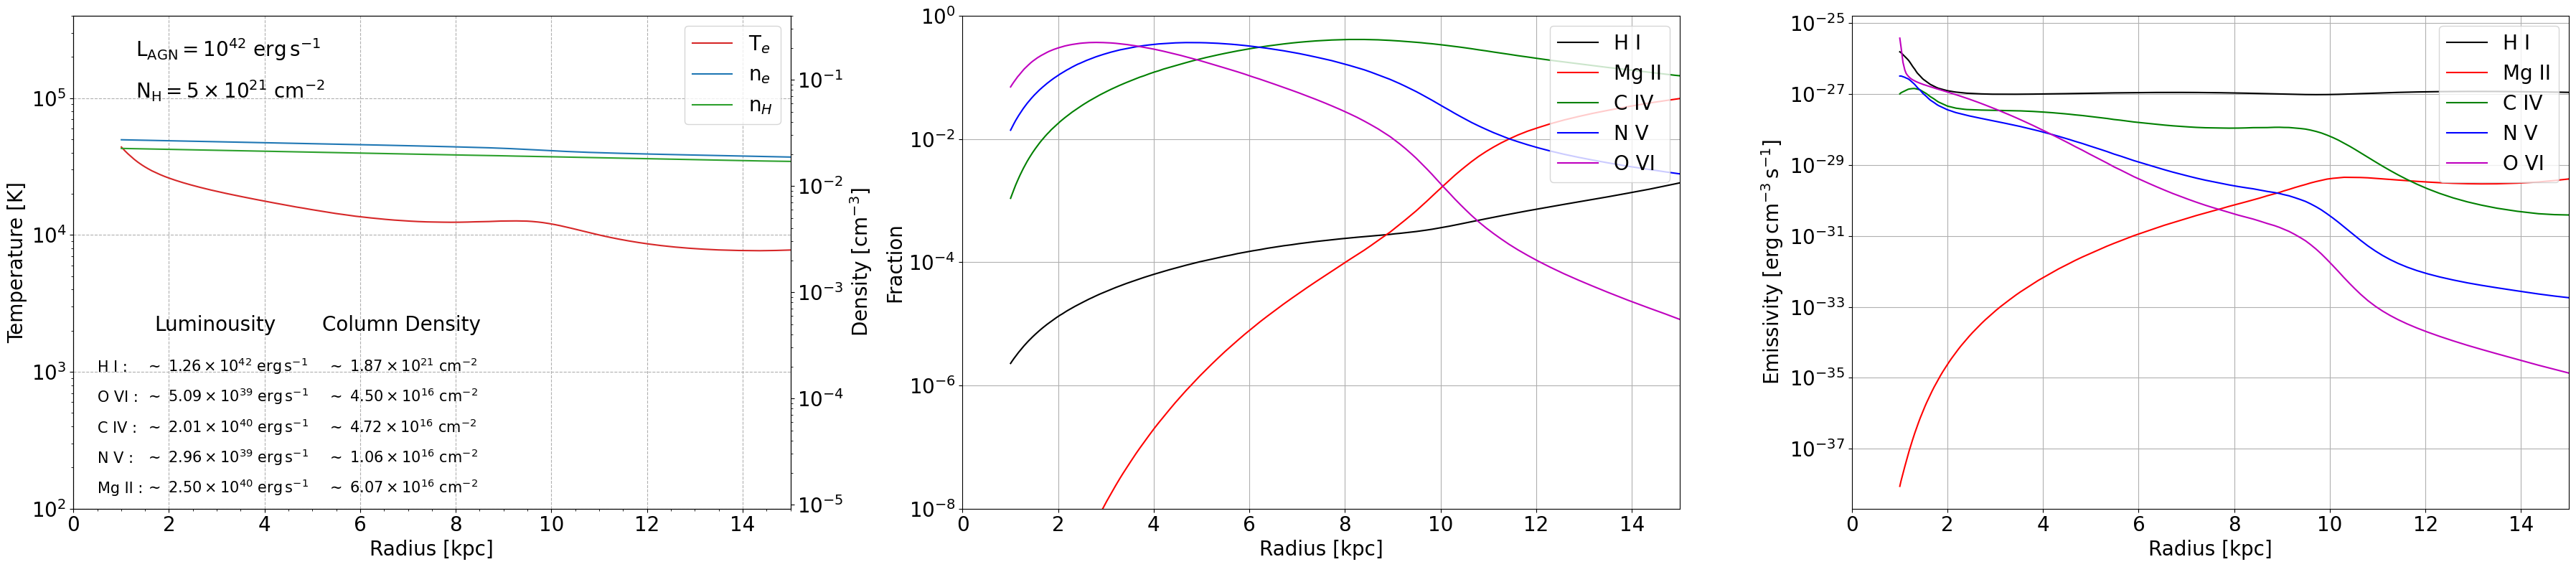

In [ ]:
# 필요한 라이브러리 import (이미 되어 있다고 가정)

# 데이터 준비 (이미 되어 있다고 가정)

# 그래프 그리기
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(36, 8))

# 첫 번째 subplot (온도와 밀도)
color = 'tab:red'
ax1.set_xlabel('Radius [kpc]', fontsize=20)
ax1.set_ylabel('Temperature [K]', fontsize=20)
ax1.plot(Mod.radius/kpc, Mod.te, color=color, label=r'T$_{e}$')
ax1.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.minorticks_on()
ax1.set_xlim(0,15)
ax1.set_yscale('log')
ax1.set_ylim(top=4e5,bottom=100)
ax1.grid(True,linestyle='--')

ax1_twin = ax1.twinx()
color = 'tab:blue'
ax1_twin.set_ylabel('Density [cm$^{-3}$]', fontsize=20)
ax1_twin.plot(Mod.radius/kpc, Mod.ne, color=color, label=r'n$_{e}$')
ax1_twin.plot(Mod.radius/kpc, Mod.nH, color='tab:green', label=r'n$_{H}$')
ax1_twin.tick_params(axis='y', labelsize=20)
ax1_twin.set_yscale('log')
ax1_twin.set_ylim(top=0.4)

def format_scientific(number):
    exponent = int(np.log10(number))
    mantissa = number / 10**exponent
    return f'{mantissa:.2f} \\times 10^{{{exponent}}}'

# 로그 스케일에서 균일한 간격을 위한 y 좌표 계산
y_base = 2e3
y_factor = 0.6  # 간격 조절을 위한 인자
y_coords = [y_base * y_factor**i for i in range(5)]

ax1.text(1.3, 2e5, r'$\rm L_{\rm AGN} = 10^{42} ~ \rm erg \, \rm s^{-1}$', fontsize=20)
ax1.text(1.3, 1e5, r'$\rm N_{H} = 5 \times 10^{21} ~ \rm cm^{-2}$', fontsize=20)

di = 2
ax1.text(1.7, y_coords[0] , r'Luminousity', fontsize=20)
ax1.text(5.2, y_coords[0] , r'Column Density', fontsize=20)

labels = ['H I', 'O VI', 'C IV', 'N V', 'Mg II']
luminosities = [Lum_Lya, Lum_O6, Lum_C4, Lum_N5, Lum_Mg2]
column_densities = [N_HI, N_OVI, N_CIV, N_NV, N_MgII]

for i, (label, lum, col_den) in enumerate(zip(labels, luminosities, column_densities)):
    ax1.text(0.5, y_coords[i]/di, f'{label} :', fontsize=15)
    ax1.text(1.5, y_coords[i]/di , r'$\sim ~ {} ~ \rm erg \, \rm s^{{-1}}$'.format(format_scientific(lum)), fontsize=15)
    ax1.text(5.3, y_coords[i]/di , r'$\sim ~ {} ~ \rm cm^{{-2}}$'.format(format_scientific(col_den)), fontsize=15)


lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=20)

# 두 번째 subplot (이온 분율)
ax2.plot(R,HI_frac,'k',label='H I')
ax2.plot(R,MgII_frac,'r',label='Mg II')
ax2.plot(R,CIV_frac,'g',label='C IV')
ax2.plot(R,NV_frac,'b',label='N V')
ax2.plot(R,OVI_frac,'m',label='O VI')

ax2.set_yscale('log')
ax2.set_xlim(0,15)
ax2.set_ylim(1e-8,1)
ax2.set_xlabel('Radius [kpc]', fontsize=20)
ax2.set_ylabel('Fraction', fontsize=20)
ax2.tick_params(axis='both', labelsize=20)
ax2.grid(True)
ax2.legend(loc='upper right',fontsize=20)
plt.tight_layout()
# 세 번째 subplot (방출도)
ax3.plot(R,HI_emis,'k',label='H I')
ax3.plot(R,MgII_emis,'r',label='Mg II')
ax3.plot(R,CIV_emis,'g',label='C IV')
ax3.plot(R,NV_emis,'b',label='N V')
ax3.plot(R,OVI_emis,'m',label='O VI')

ax3.set_yscale('log')
ax3.set_xlim(0,15)
ax3.set_xlabel('Radius [kpc]', fontsize=20)
ax3.set_ylabel(r'Emissivity [$\rm erg\,cm^{-3}\,s^{-1}$]', fontsize=20)
ax3.tick_params(axis='both', labelsize=20)
ax3.grid(True)
ax3.legend(loc='upper right',fontsize=20)

plt.tight_layout()
# plt.show()
# PDF 파일로 저장
# plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/Cloudy_CIV.pdf', dpi=300, bbox_inches='tight')
# plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/Re_BOES_{name}_WO',bbox_inches='tight')

In [ ]:
# import numpy as np                                                                        
# import matplotlib.pyplot as plt
# import pyCloudy as pc
# import pyneb as pn
# from astropy    import constants as const
# from astropy.io import ascii

# from scipy.integrate import simps
# from numpy import log10, exp

# kpc = const.kpc.cgs.value

# path = r'/home/jin/CIV_Photoionization/Lumin_44/CIV_Lumin_44'
# Mod = pc.CloudyModel(path)
# Mod.print_lines()
# A = Mod.n_ions
# #print(A)
# Mod.ionic_names
# Lum_Lya = float(Mod.get_emis_vol('H__1_121567A'))

# Lum_O6 = float(Mod.get_emis_vol('O__6_103191A')) + float(Mod.get_emis_vol('O__6_103762A'))
# Lum_C4 = float(Mod.get_emis_vol('C__4_154819A')) + float(Mod.get_emis_vol('C__4_155078A'))
# Lum_N5 = float(Mod.get_emis_vol('N__5_123882A')) + float(Mod.get_emis_vol('N__5_124280A'))
# Lum_Mg2 = float(Mod.get_emis_vol('MG_2_279553A'))+ float(Mod.get_emis_vol('MG_2_280271A'))




# #print(np.sum(Mod.dr*Mod.nH))

# N_H = sum(Mod.dr*Mod.nH)
# frac_C = 2.45E-04
# frac_O = 4.90E-04
# frac_N = 8.51E-05
# frac_Mg = 3.47E-05

# N_HI = sum(Mod.dr*Mod.nH*Mod.get_ionic('H',0))
# N_HII = sum(Mod.dr*Mod.nH*Mod.get_ionic('H',1))
# N_OVI = frac_O*sum(Mod.dr*Mod.nH*Mod.get_ionic('O',5))
# N_NV = frac_N*sum(Mod.dr*Mod.nH*Mod.get_ionic('N',4))
# N_CIV = frac_C*sum(Mod.dr*Mod.nH*Mod.get_ionic('C',3))

# f = open('/home/jin/CIV_Photoionization/Lumin_44/CIV_Lumin_44.ele_Mg','r')
# header = f.readline()
# frac_Mg_II = np.zeros(410)
# # print(len(f[0]))
# i = 0
# for line in f:
#     line = line.strip()
#     columns = line.split()
#     j = float(columns[2])
#     frac_Mg_II[i] = j
#     i = i + 1
# N_MgII = frac_Mg*sum(Mod.dr*Mod.nH*frac_Mg_II)

# print('N_H', N_H)
# print('Lya',Lum_Lya, N_HI)
# print('O VI',Lum_O6, N_OVI)
# print('C IV',Lum_C4, N_CIV)
# print('N V',Lum_N5, N_NV)
# print('Mg II',Lum_Mg2, N_MgII)




In [ ]:
# HI_emis = Mod.get_emis('H__1_121567A')
# MgII_emis = (Mod.get_emis('MG_2_279553A'))+ (Mod.get_emis('MG_2_280271A'))
# OVI_emis = (Mod.get_emis('O__6_103191A')) +(Mod.get_emis('O__6_103762A'))
# CIV_emis = (Mod.get_emis('C__4_154819A')) + (Mod.get_emis('C__4_155078A'))
# NV_emis = (Mod.get_emis('N__5_123882A')) + (Mod.get_emis('N__5_124280A'))
# R = Mod.radius/kpc

In [ ]:
# fig = plt.figure(1,figsize=(12, 8))
# plt.plot(R,HI_emis,'k',label='H I')
# plt.plot(R,MgII_emis,'r',label='Mg II')
# plt.plot(R,CIV_emis,'g',label='C IV')
# plt.plot(R,NV_emis,'b',label='N V')
# plt.plot(R,OVI_emis,'m',label='O VI')

# plt.yscale('log')
# # plt.xlim(0,15)
# plt.ylim(1e-30,1e-25)
# plt.xlabel('Radius [kpc]', fontsize=20)
# plt.ylabel('Emissivity', fontsize=20)
# # ax1.plot(Mod.radius/kpc, Mod.te, color=color, label=r'T$_{e}$')
# plt.tick_params(axis='y', labelsize=20)
# plt.tick_params(axis='x', labelsize=20)
# plt.grid(True)
# plt.legend(loc='upper right',fontsize=25)

In [ ]:
# f = open('/home/jin/CIV_Photoionization/Lumin_44/CIV_Lumin_44.ele_C','r')
# header = f.readline()
# CIV_frac = np.zeros(410)
# # print(len(f[0]))
# i = 0
# for line in f:
#     line = line.strip()
#     columns = line.split()
#     j = float(columns[4])
#     CIV_frac[i] = j
#     i = i + 1

# f = open('/home/jin/CIV_Photoionization/Lumin_44/CIV_Lumin_44.ele_H','r')
# header = f.readline()
# HI_frac = np.zeros(410)
# # print(len(f[0]))
# i = 0
# for line in f:
#     line = line.strip()
#     columns = line.split()
#     j = float(columns[1])
#     HI_frac[i] = j
#     i = i + 1

# f = open('/home/jin/CIV_Photoionization/Lumin_44/CIV_Lumin_44.ele_Mg','r')
# header = f.readline()
# MgII_frac = np.zeros(410)
# # print(len(f[0]))
# i = 0
# for line in f:
#     line = line.strip()
#     columns = line.split()
#     j = float(columns[2])
#     MgII_frac[i] = j
#     i = i + 1

# f = open('/home/jin/CIV_Photoionization/Lumin_44/CIV_Lumin_44.ele_O','r')
# header = f.readline()
# OVI_frac = np.zeros(410)
# # print(len(f[0]))
# i = 0
# for line in f:
#     line = line.strip()
#     columns = line.split()
#     j = float(columns[6])
#     OVI_frac[i] = j
#     i = i + 1

# f = open('/home/jin/CIV_Photoionization/Lumin_44/CIV_Lumin_44.ele_N','r')
# header = f.readline()
# NV_frac = np.zeros(410)
# # print(len(f[0]))
# i = 0
# for line in f:
#     line = line.strip()
#     columns = line.split()
#     j = float(columns[5])
#     NV_frac[i] = j
#     i = i + 1

# R = Mod.radius/kpc

In [ ]:
# fig = plt.figure(1,figsize=(12, 8))
# plt.plot(R,HI_frac,'k',label='H I')
# plt.plot(R,MgII_frac,'r',label='Mg II')
# plt.plot(R,CIV_frac,'g',label='C IV')
# plt.plot(R,NV_frac,'b',label='N V')
# plt.plot(R,OVI_frac,'m',label='N V')

# plt.yscale('log')
# # plt.xlim(0,15)
# plt.ylim(10e-8,0)
# plt.xlabel('Radius [kpc]', fontsize=20)
# plt.ylabel('Temperature [K]', fontsize=20)
# # ax1.plot(Mod.radius/kpc, Mod.te, color=color, label=r'T$_{e}$')
# plt.tick_params(axis='y', labelsize=20)
# plt.tick_params(axis='x', labelsize=20)
# plt.grid(True)
# plt.legend(fontsize=25)